## Superstore Sale Analysis

In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Loading Data

In [7]:
df = pd.read_csv('superstore.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [8]:
print(df['Order Date'].head(10).tolist())

['08/11/2017', '08/11/2017', '12/06/2017', '11/10/2016', '11/10/2016', '09/06/2015', '09/06/2015', '09/06/2015', '09/06/2015', '09/06/2015']


### Necessary EDA and Preprocessing

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [10]:
df = df.dropna()

In [11]:
df.shape

(9789, 18)

In [12]:
df.duplicated().sum()

0

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True, errors='coerce')

# Check results
print("Order Date NaT count:", df['Order Date'].isna().sum())
print("Ship Date NaT count:", df['Ship Date'].isna().sum())

print(df[['Order Date', 'Ship Date']].head())


Order Date NaT count: 0
Ship Date NaT count: 0
  Order Date  Ship Date
0 2017-11-08 2017-11-11
1 2017-11-08 2017-11-11
2 2017-06-12 2017-06-16
3 2016-10-11 2016-10-18
4 2016-10-11 2016-10-18


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9789 non-null   int64         
 1   Order ID       9789 non-null   object        
 2   Order Date     9789 non-null   datetime64[ns]
 3   Ship Date      9789 non-null   datetime64[ns]
 4   Ship Mode      9789 non-null   object        
 5   Customer ID    9789 non-null   object        
 6   Customer Name  9789 non-null   object        
 7   Segment        9789 non-null   object        
 8   Country        9789 non-null   object        
 9   City           9789 non-null   object        
 10  State          9789 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9789 non-null   object        
 13  Product ID     9789 non-null   object        
 14  Category       9789 non-null   object        
 15  Sub-Category   9789 non-nu

In [15]:
df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Maine', 'South Dakota', 'Idaho',
       'North Dakota', 'Wyoming', 'West Virginia'], dtype=object)

In [16]:
df['City'].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [17]:
df['City'] = df['City'].str.strip().str.title()
df['State'] = df['State'].str.strip().str.title()


In [18]:

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

cities = df['City'].unique()
for city in cities[:100]:  # limit to avoid long output
    matches = process.extract(city, cities, limit=3)
    for match in matches:
        if match[0] != city and match[1] > 90:
            print(f"{city} ↔ {match[0]} (score: {match[1]})")


C:\Users\Laptop Wala\AppData\Local\Programs\Python\Python311\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Orland Park ↔ Overland Park (score: 92)
Edmond ↔ Edmonds (score: 92)
Edmond ↔ Redmond (score: 92)


In [19]:
df['Country'].unique()

array(['United States'], dtype=object)

In [20]:
df['Postal Code'] = df['Postal Code'].astype('Int64').astype(str)


In [21]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [22]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [23]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [24]:
# Extract Year, Month, Day from Order Date
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.day
df['Order Weekday'] = df['Order Date'].dt.day_name()

# Extract the same from Ship Date
df['Ship Year'] = df['Ship Date'].dt.year
df['Ship Month'] = df['Ship Date'].dt.month
df['Ship Day'] = df['Ship Date'].dt.day
df['Ship Weekday'] = df['Ship Date'].dt.day_name()


In [25]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Order Year,Order Month,Order Day,Order Weekday,Ship Year,Ship Month,Ship Day,Ship Weekday
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2017,11,8,Wednesday,2017,11,11,Saturday
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11,8,Wednesday,2017,11,11,Saturday
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6,12,Monday,2017,6,16,Friday
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10,11,Tuesday,2016,10,18,Tuesday
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2016,10,11,Tuesday,2016,10,18,Tuesday


In [26]:
df['Shipping Delay (Days)'] = (df['Ship Date'] - df['Order Date']).dt.days


In [27]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Order Year,Order Month,Order Day,Order Weekday,Ship Year,Ship Month,Ship Day,Ship Weekday,Shipping Delay (Days)
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2017,11,8,Wednesday,2017,11,11,Saturday,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,2017,11,8,Wednesday,2017,11,11,Saturday,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,14.6200,2017,6,12,Monday,2017,6,16,Friday,4
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,2016,10,11,Tuesday,2016,10,18,Tuesday,7
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,22.3680,2016,10,11,Tuesday,2016,10,18,Tuesday,7


### Analyzing Visualizations using Matplotlib, Seaborn and Plotly

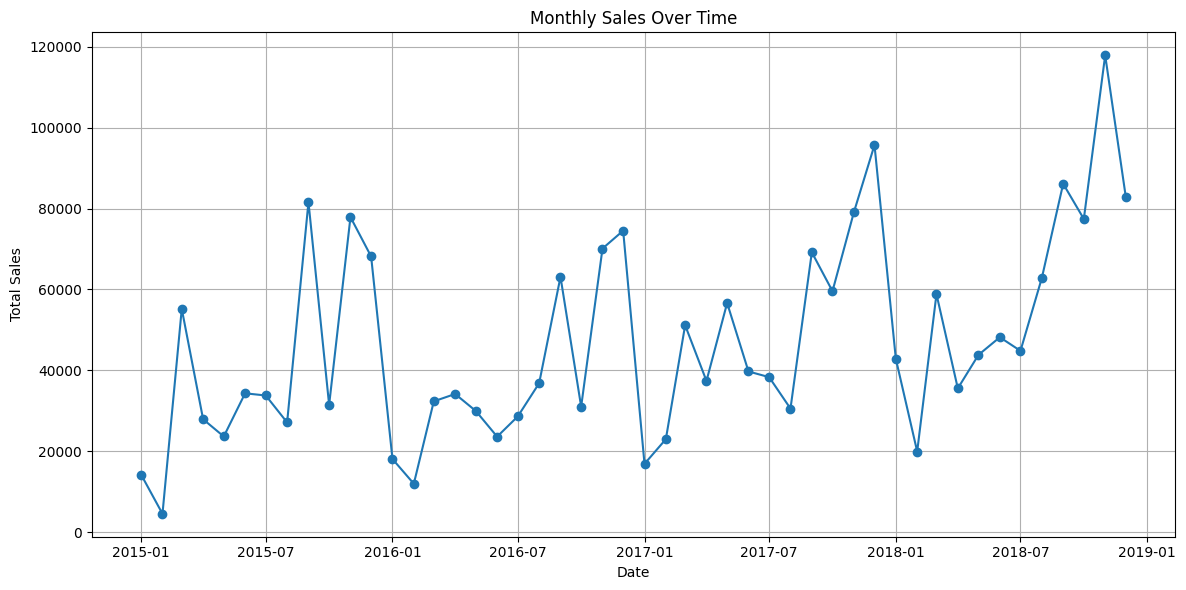

In [28]:


# Group sales by year and month
monthly_sales = df.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()

# Create a proper date column for plotting
monthly_sales['Year-Month'] = pd.to_datetime(monthly_sales['Order Year'].astype(str) + '-' + monthly_sales['Order Month'].astype(str))

# Sort by date
monthly_sales = monthly_sales.sort_values('Year-Month')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Year-Month'], monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


### Sales by Category

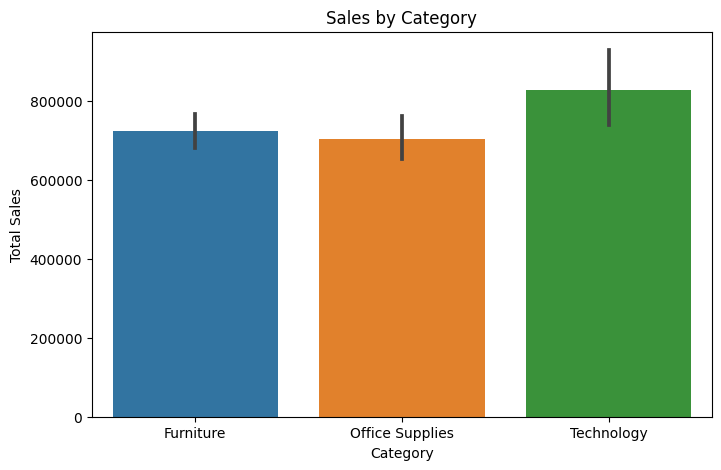

In [29]:

plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Category', y='Sales', estimator='sum')
plt.title('Sales by Category')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.show()


### Sales by Region

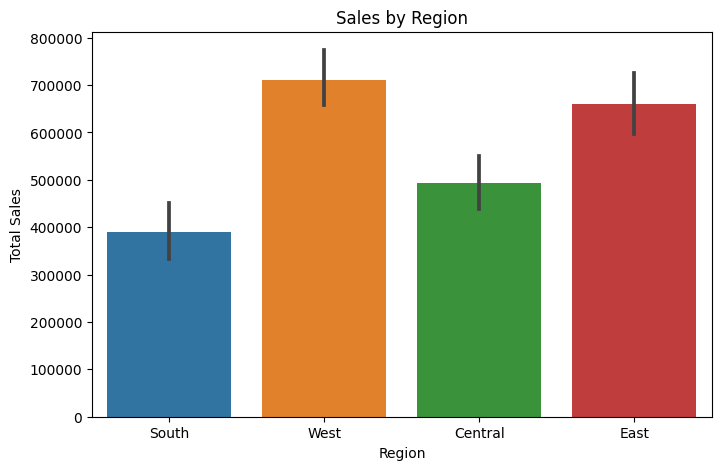

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Region', y='Sales', estimator='sum')
plt.title('Sales by Region')
plt.ylabel('Total Sales')
plt.xlabel('Region')
plt.show()



### Top 10 Cities by Sales

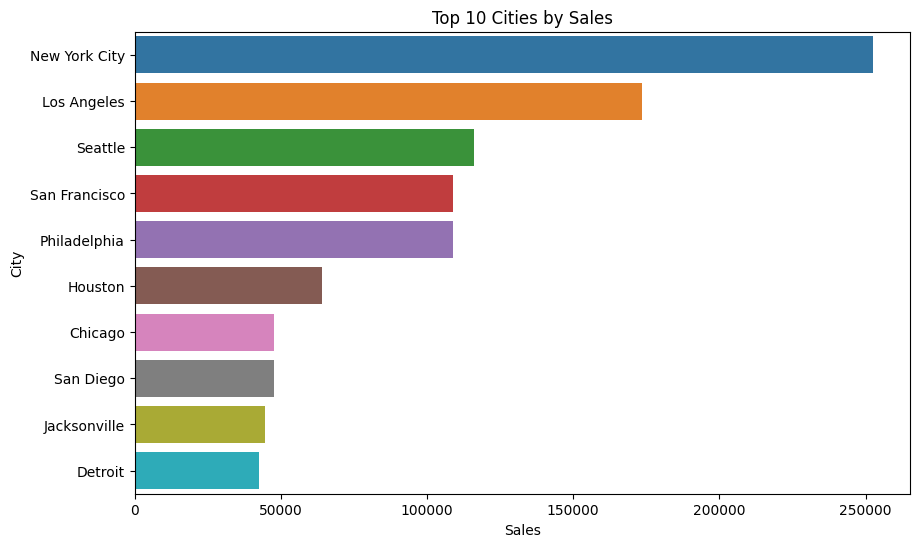

In [31]:
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=top_cities, x='Sales', y='City')
plt.title('Top 10 Cities by Sales')
plt.xlabel('Sales')
plt.ylabel('City')
plt.show()

### Distribution of Shipping Delay

C:\Users\Laptop Wala\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


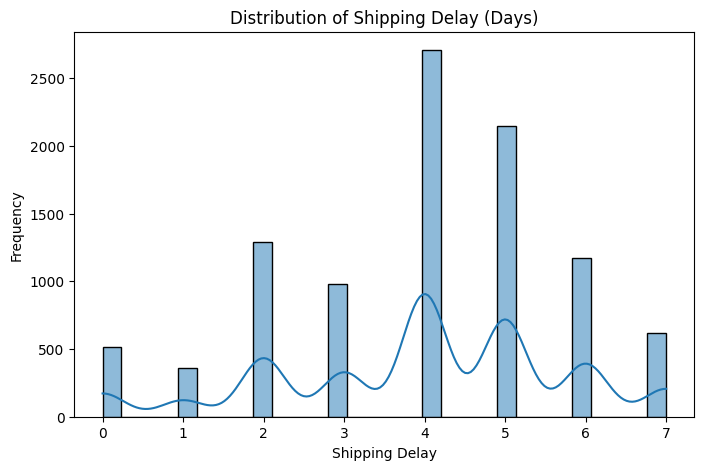

In [32]:
plt.figure(figsize=(8,5))
sns.histplot(df['Shipping Delay (Days)'], bins=30, kde=True)
plt.title('Distribution of Shipping Delay (Days)')
plt.xlabel('Shipping Delay')
plt.ylabel('Frequency')
plt.show()


### Sales Distribution by Ship Mode

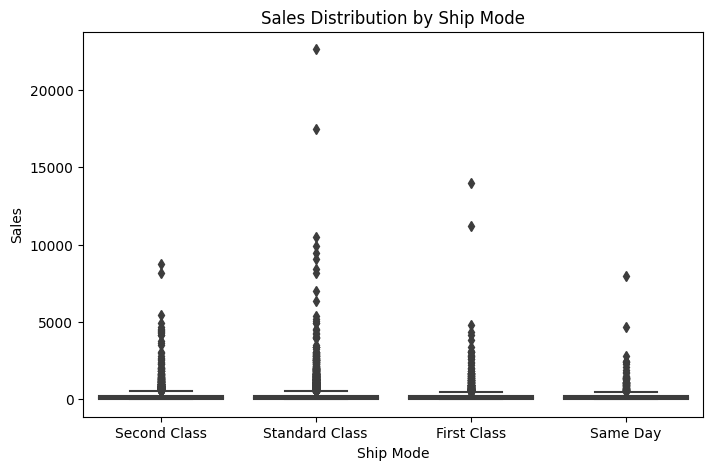

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Ship Mode', y='Sales')
plt.title('Sales Distribution by Ship Mode')
plt.ylabel('Sales')
plt.xlabel('Ship Mode')
plt.show()


### Order Count by Weekday

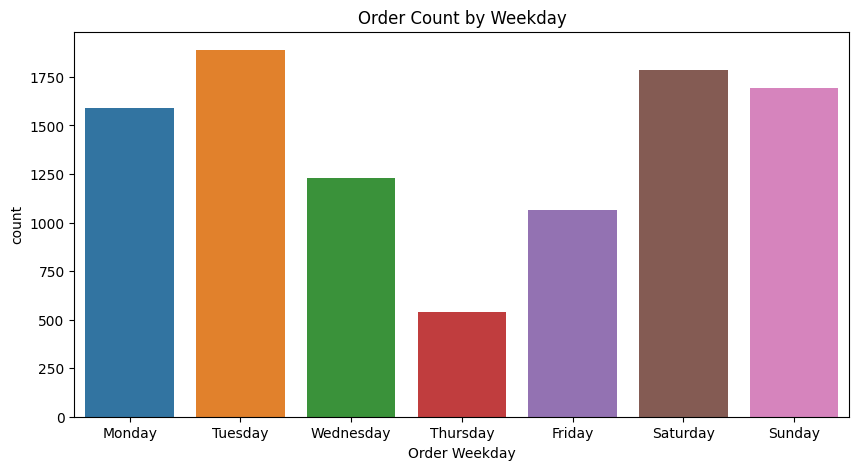

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Order Weekday', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Order Count by Weekday')
plt.show()


### Sales by Sub-Category

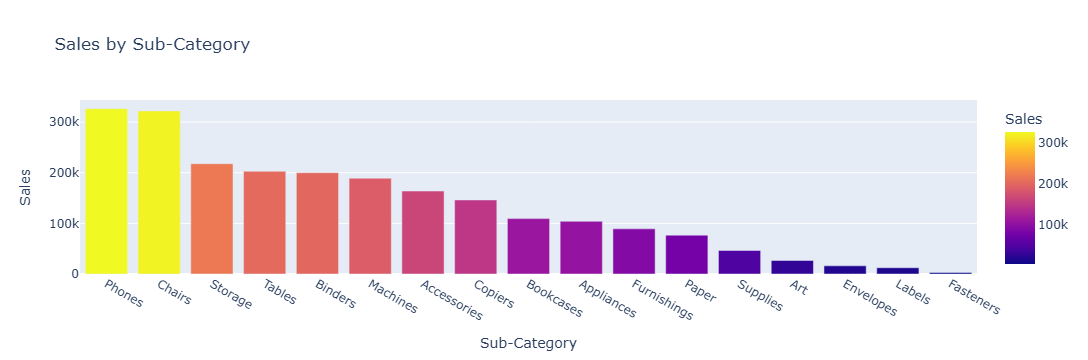

In [35]:
fig = px.bar(df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False).reset_index(),
             x='Sub-Category', y='Sales', color='Sales',
             title="Sales by Sub-Category")
fig.show()


### Sales Distribution By Region

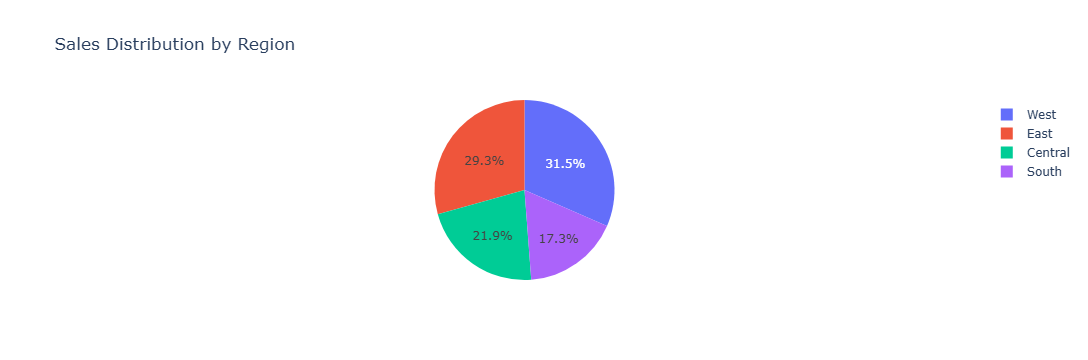

In [36]:
fig = px.pie(df.groupby("Region")["Sales"].sum().reset_index(),
             names='Region', values='Sales',
             title="Sales Distribution by Region")
fig.show()


### Saving cleaned dataset (Used in PowerBI Dashboard)

In [37]:
df.to_csv("cleaned_superstore.csv", index=False)

